<a href="https://colab.research.google.com/github/samhitamahadevan/TwiiterNormalisation/blob/main/Twitter_Normalisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Set-Up

In [ ]:
import pandas as pd
import re
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
!pip install textacy==0.9.1

In [ ]:
import jellyfish
!pip install ngram

In [ ]:
!apt install -qq enchant
!pip install pyenchant

The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../0-libtext-iconv-perl_1.7-5build6_amd64.deb ...
Unpacking libtext-iconv-perl (1.7-5build6) ...
Selecting previously unselected package libaspe

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


# Dataset

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/dataset.txt',error_bad_lines=False,header = None)
df2.head()

b'Skipping line 14: expected 1 fields, saw 2\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 3\nSkipping line 32: expected 1 fields, saw 2\nSkipping line 33: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 3\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 44: expected 1 fields, saw 2\nSkipping line 56: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 3\nSkipping line 67: expected 1 fields, saw 2\nSkipping line 71: expected 1 fields, saw 3\nSkipping line 75: expected 1 fields, saw 2\nSkipping line 90: expected 1 fields, saw 2\nSkipping line 93: expected 1 fields, saw 2\nSkipping line 98: expected 1 fields, saw 2\nSkipping line 100: expected 1 fields, saw 2\nSkipping line 103: expected 1 fields, saw 2\nSkipping line 107: expected 1 fields, saw 4\nSkipping line 108: expected 1 fields, saw 2\nSkipping line 123: expected 1 fields, saw 2\nSkipping line 125: expect

,0
0,"rt @teddyferrari1 : "" ah ... @datzmenoni : why..."
1,u have a very sexy header @jaibrooks1 rawr
2,i miss u my bie ! where u wanna out wif me ? h...
3,"cantik . rt @historyinpics : julie christie ,..."
4,rt @fvckxhemmings : did calum slip ?!! omfg


In [ ]:
print('Dataset Size: ',df2.size)
df = df2
df = df.iloc[:,-1]

Dataset Size:  2470


In [ ]:
df_1 = df
df_1.head()

0    rt @teddyferrari1 : " ah ... @datzmenoni : why...
1           u have a very sexy header @jaibrooks1 rawr
2    i miss u my bie ! where u wanna out wif me ? h...
3     cantik . rt @historyinpics : julie christie ,...
4          rt @fvckxhemmings : did calum slip ?!! omfg
Name: 0, dtype: object

# Normalisation

Converting to Lowercase and removing digits

In [ ]:
df_1 = df_1.str.replace('\d+', '')
df_1 = df_1.str.lower()
df_1.head()

0    rt @teddyferrari : " ah ... @datzmenoni : why ...
1            u have a very sexy header @jaibrooks rawr
2    i miss u my bie ! where u wanna out wif me ? h...
3     cantik . rt @historyinpics : julie christie ,...
4          rt @fvckxhemmings : did calum slip ?!! omfg
Name: 0, dtype: object

In [ ]:
df_1[0]

'rt @teddyferrari : " ah ... @datzmenoni : why sub ozil " @lexzydoo_ab : opolo eyes u no fit open eyes ""'

Removal of URLs, Mentions

In [ ]:
df_1 = df_1.apply(p.clean)
df_1.head()

0    rt : " ah ... : why sub ozil " : opolo eyes u ...
1                       u have a very sexy header rawr
2    i miss u my bie ! where u wanna out wif me ? h...
3    cantik . rt : julie christie , . photograph by...
4                         rt : did calum slip ?!! omfg
Name: 0, dtype: object

Removal of Punctutation 

In [ ]:
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', (word))
        if new_word != '':
            new_words.append(new_word)
    str_ = ''.join(new_words)  
    return str_

df_1 = df_1.apply(remove_punctuation)

In [ ]:
df_1.head()

0    rt   ah   why sub ozil   opolo eyes u no fit o...
1                       u have a very sexy header rawr
2    i miss u my bie  where u wanna out wif me  hav...
3    cantik  rt  julie christie   photograph by ric...
4                             rt  did calum slip  omfg
Name: 0, dtype: object

Lemmatization + Tokenization

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w in \
                                     w_tokenizer.tokenize((text))]
df_1 = df_1.apply(lemmatize_text)

df_1.head()

0    [rt, ah, why, sub, ozil, opolo, eye, u, no, fi...
1               [u, have, a, very, sexy, header, rawr]
2    [i, miss, u, my, bie, where, u, wanna, out, wi...
3    [cantik, rt, julie, christie, photograph, by, ...
4                         [rt, did, calum, slip, omfg]
Name: 0, dtype: object

Removal of Stop Words

In [ ]:
stop_words = set(stopwords.words('english'))
df_1 = df_1.apply(lambda x: [item for item in \
                         x if item not in stop_words])


In [ ]:
df_1[:20]

0     [rt, ah, sub, ozil, opolo, eye, u, fit, open, ...
1                               [u, sexy, header, rawr]
2     [miss, u, bie, u, wanna, wif, wonderful, day, ...
3     [cantik, rt, julie, christie, photograph, rich...
4                               [rt, calum, slip, omfg]
5              [didnt, make, brah, friend, jack, storm]
6     [pshh, went, got, mine, done, regardless, im, ...
7                         [syempre, right, age, hahaha]
8                  [shit, rockin, go, head, show, bria]
9     [rt, word, describe, exo, luhan, pain, chanyeo...
10    [rt, ukip, ha, two, councillor, elected, north...
11    [lol, cause, said, woulda, falling, right, along]
12                 [yea, wa, gonna, hit, u, guess, lol]
13                           [obvi, doesnt, understand]
14                           [im, friend, grecia, know]
15               [usa, spalding, nba, street, spalding]
16                  [haha, im, ony, piss, everyone, tl]
17    [rt, haru, hana, q, something, cant, despi

# Proper Nouns

In [ ]:
# def ProperNounExtractor(text):
#     print('PROPER NOUNS EXTRACTED :')
#     sentences = nltk.sent_tokenize(text)
#     for sentence in sentences:
#     # for x in df_1[i]:
#         words = nltk.word_tokenize(sentence)
#         words = [word for word in words if word not in set(stopwords.words('english'))]
#         tagged = nltk.pos_tag(words)
#         for (word, tag) in tagged:
#             if tag == 'NNP': # If the word is a proper noun
#                 print(word)
#         # i=i+1

# text ="My name is Samhita aN Stop"
# ProperNounExtractor(text)

In [ ]:
# import nltk
# nltk.tag.pos_tag("I am named john doe my trehdj".split())

In [ ]:
# sentence = "I am named samhita and bhagavathi and tree"
# tagged_sentence = nltk.tag.pos_tag(sentence.split())
# edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS' and tag !='NN']
# print(' '.join(edited_sentence))

# Identification of OOV words

In [ ]:
import enchant

In [ ]:
from enchant.checker import SpellChecker
chkr = SpellChecker("en_US")
data = []
for i in range(len(df_1)):
  chkr.set_text(' '.join(df_1.iloc[i]))
  for err in chkr:
    # print(err.check())
    data.append([err.word, 'OOV'])

oov_df = pd.DataFrame(data, columns = ['Word', 'OOV'])
oov_df.to_csv(r'oov.csv', index=False)

In [ ]:
import pandas as pd
oov_df = pd.read_csv('oov.csv',encoding='utf-8')
oov_df


,Word,OOV
0,ozil,OOV
1,opolo,OOV
2,rawr,OOV
3,bie,OOV
4,wif,OOV
...,...,...
7703,jaggery,OOV
7704,wada,OOV
7705,southbank,OOV
7706,loctite,OOV


In [ ]:
oov_df = oov_df.drop_duplicates()
oov_df

,Word,OOV
0,ozil,OOV
1,opolo,OOV
2,rawr,OOV
3,bie,OOV
4,wif,OOV
...,...,...
7701,chu,OOV
7703,jaggery,OOV
7704,wada,OOV
7705,southbank,OOV


# Exaggeration removal


In [ ]:
# def _reduce_exaggerations(text):
#     """
#     Auxiliary function to help with exxagerated words.
#     Examples:
#         woooooords -> words
#         yaaaaaaaaaaaaaaay -> yay
#     """
#     correction = str(text)
#     #TODO work on complexity reduction.
#     return re.sub(r'([\w])\1+', r'\1', correction)
# text = "yaaaaaaaaaaaaaaaay bettteeeer ladder omgggggg"
# _reduce_exaggerations(text)

In [ ]:
oov_df['Word'] = oov_df['Word'].apply(lambda word: re.sub(r'([\w])\1+', r'\1', word))
oov_df

,Word,OOV
0,ozil,OOV
1,opolo,OOV
2,rawr,OOV
3,bie,OOV
4,wif,OOV
...,...,...
7701,chu,OOV
7703,jagery,OOV
7704,wada,OOV
7705,southbank,OOV


#Dictionary


In [ ]:
# dicts = [line.strip() for line in open("drive/MyDrive/Twitter Lexical Normalisation/dict.txt", 'r')]
dicts = [line.strip() for line in open("/content/drive/MyDrive/Twitter Lexical Normalisation/dict1 (1).txt", 'r',encoding='utf-8')]
dicts

['aardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abase',
 'abased',
 'abasement',
 'abash',
 'abashed',
 'abate',
 'abated',
 'abatement',
 'abates',
 'abattoir',
 'abattoirs',
 'abbe',
 'abbess',
 'abbey',
 'abbeys',
 'abbot',
 'abbots',
 'abbreviate',
 'abbreviated',
 'abbreviates',
 'abbreviating',
 'abbreviation',
 'abbreviations',
 'abdicate',
 'abdicated',
 'abdicates',
 'abdicating',
 'abdication',
 'abdomen',
 'abdomens',
 'abdominal',
 'abduct',
 'abducted',
 'abducting',
 'abduction',
 'abductions',
 'abductor',
 'abductors',
 'abducts',
 'abe',
 'abeam',
 'abel',
 'abele',
 'aberdeen',
 'aberrant',
 'aberration',
 'aberrations',
 'abet',
 'abets',
 'abetted',
 'abetting',
 'abeyance',
 'abhor',
 'abhorred',
 'abhorrence',
 'abhorrent',
 'abhors',
 'abide',
 'abided',
 'abides',
 'abiding',
 'abidjan',
 'abies',
 'abilities',
 'ability',
 'abject',
 'abjectly',
 'abjure',
 'abjured',
 'abla

In [ ]:
# class MatchEngine(object):
#     def __init__(self, dicts):
#         self.dicts = dicts

#     def find_match_levenshtein(self,token):
#         candidates = []
#         best_score = 2
#         bestMatch = "NA"
#         for word in self.dicts:
#             score = jellyfish.levenshtein_distance(
#                 token, word.lower())
#             if score <= best_score:
#                 best_score = score
#                 candidates.append(word.lower())
#         if len(candidates) > 1:
#             G = ngram.NGram(candidates)
#             candidates = G.search(token)
#             if len(candidates) > 0:
#                 bestMatch = candidates[0][0]

#         elif len(candidates) == 1:
#             bestMatch = candidates[0]

#         # G = ngram.NGram(candidates)
#         # best_candidates = G.search(token, threshold=0.3)

#         # results = [item[0] for item in best_candidates]
#         # print(results)

#         # is_match = False
#         # for word in candidates:
#         #     if word == canonical:
#         #         is_match = True
#         #         break

#         # if len(best_candidates) > 0:
#         #    best_match = best_candidates[0][0]
#         # else:
#         #    best_match = ""

#         # print(token+"---------"+bestMatch)

#         # return candidates
#         return bestMatch

#     def find_match_levenshtein_soundex(self, token):
#         candidates = []
#         best_score = 2
#         bestMatch = "NA"
#         for word in self.dicts:
#             score = jellyfish.levenshtein_distance(
#                 token, word.lower())
#             if score <= best_score:
#                 best_score = score
#                 candidates.append(word.lower())

#         token_soundex = jellyfish.soundex(token)
#         match_soundex = [match for match in candidates if jellyfish.soundex(
#             match) == token_soundex]

#         G = ngram.NGram(match_soundex)
#         best_candidates = G.search(token, threshold=0.09)

#         # results = [item[0] for item in best_candidates]

#         # is_match = False
#         # for word in match_soundex:
#         #     if word == canonical:
#         #         is_match = True
#         #         break

#         if len(best_candidates) > 0:
#            best_match = best_candidates[0][0]
#         else:
#            best_match = "NA"
#         # print(token+"-------"+best_match)
#         # return match_soundex
#         return best_match

#     def find_match_levenshtein_metaphone(self, token):
#         candidates = []
#         best_score = 2
#         for word in self.dicts:
#             score = jellyfish.levenshtein_distance(
#                 token, word.lower())
#             if score <= best_score:
#                 best_score = score
#                 candidates.append(word.lower())

#         token_metaphone = jellyfish.metaphone(token)
#         match_metaphone = [match for match in candidates if jellyfish.metaphone(
#             match) == token_metaphone]

#         G = ngram.NGram(match_metaphone)
#         best_candidates = G.search(token, threshold=0.09)

#         #results = [item[0] for item in best_candidates]

#         # is_match = False
#         # for word in match_metaphone:
#         #     if word == canonical:
#         #         is_match = True
#         #         break

#         if len(best_candidates) > 0:
#            best_match = best_candidates[0][0]
#         else:
#            best_match = "NA"
#         # print(token+"-------"+best_match)
#         # return match_metaphone
#         return best_match

In [ ]:
class MatchEngine(object):
    def __init__(self, dicts):
        self.dicts = dicts

    def find_match_levenshtein(self,token):
        candidates = []
        best_score = 2
        bestMatch = "NA"
        for word in self.dicts:
            score = jellyfish.levenshtein_distance(
                token, word.lower())
            if score <= best_score:
                best_score = score
                candidates.append(word.lower())
        if len(candidates) > 1:
            G = ngram.NGram(candidates)
            candidates = G.search(token)
            if len(candidates) > 0:
                bestMatch = candidates[0][0]

        elif len(candidates) == 1:
            bestMatch = candidates[0]
        return bestMatch

    def find_match_levenshtein_soundex(self, token):
        candidates = []
        best_score = 2
        bestMatch = "NA"
        for word in self.dicts:
            score = jellyfish.levenshtein_distance(
                token, word.lower())
            if score <= best_score:
                best_score = score
                candidates.append(word.lower())
        # print(candidates,token)
        token_soundex = jellyfish.soundex(token)
        # print(token_soundex, type(token_soundex))
        match_soundex = []
        for match in candidates:
          # print(match)
          if jellyfish.soundex(match) == token_soundex:
            
            match_soundex.append(match)
        # match_soundex = [match for match in candidates ]
        # print(match_soundex, type(match_soundex[0]))
                        #  
        # print(match_soundex)
        G = ngram.NGram(match_soundex)
        best_candidates = G.search(token, threshold=0.03)
        best_c=0.0
        if len(best_candidates) > 0:
           best_match = best_candidates[0][0]
           best_c = best_candidates[0][1]
        else:
           best_match = "NA"
        return best_c
        # return best_match

    def find_match_levenshtein_metaphone(self, token):
        candidates = []
        best_score = 2
        for word in self.dicts:
            score = jellyfish.levenshtein_distance(
                token, word.lower())
            if score <= best_score:
                best_score = score
                candidates.append(word.lower())

        token_metaphone = jellyfish.metaphone(token)
        match_metaphone = [match for match in candidates if jellyfish.metaphone(match) == token_metaphone]

        G = ngram.NGram(match_metaphone)
        best_candidates = G.search(token, threshold=0.09)
        best_c=0.0
        if len(best_candidates) > 0:
           best_match = best_candidates[0][0]
           best_c = best_candidates[0][1]
        else:
           best_match = "NA"
        # return best_match
        return best_c

In [ ]:
engine = MatchEngine(dicts)

In [ ]:
import ngram

In [ ]:
i = 1
for word in oov_df['Word']:
  bm1 = engine.find_match_levenshtein(word)
  print(word + "\t\t"+bm1)
  if i == 15:
    break
  i = i+1

ozil		oil
opolo		polo
rawr		raw
bie		bide
wif		waif
haha		haha
cantik		cant
julie		junkie
christie		christ
richard		orchard
avedon		aeon
calum		calm
omfg		omen
didnt		didnt
brah		brash


In [ ]:
pre = []
i = 1
for word in oov_df['Word']:
  bm2 = engine.find_match_levenshtein_soundex(word)
  # print(word)
  # print(bm2)
  # print("\n")
  if i == 100:
    break
  i = i+1
  pre.append([word,bm2])
nor_df = pd.DataFrame(pre, columns = ['Word','Soundex'])
nor_df.head()

,Word,Soundex
0,ozil,0.000000
1,opolo,0.181818
2,rawr,0.200000
3,bie,0.285714
4,wif,0.375000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

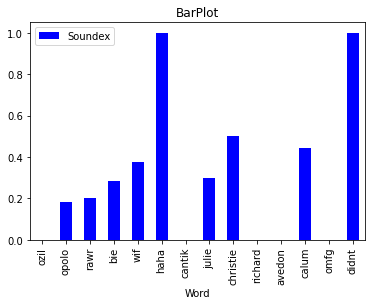

In [ ]:
# bar plot
nor_df.plot(kind = 'bar',
        x = 'Word',
        y = 'Soundex',
        color = 'blue')
  
# set the title
plt.title('BarPlot')
  
# show the plot
plt.show()

In [ ]:
i = 1
for word in oov_df['Word']:
  bm3 = engine.find_match_levenshtein_metaphone(word)
  print(word + "\t\t"+bm3)
  if i == 15:
    break
  i = i+1

ozil		NA
opolo		opal
rawr		rare
bie		be
wif		waif
haha		haha
cantik		NA
julie		july
christie		christ
richard		NA
avedon		NA
calum		calm
omfg		NA
didnt		didnt
brah		bra


In [ ]:
# bm2 = engine.find_match_levenshtein_soundex(oov_df.iloc[1837]['Word'])
# print(oov_df.iloc[1837]['Word'])
# # print(bm2)

In [ ]:
pre = []
i=1
for word in oov_df['Word']:
  # bm1 = engine.find_match_levenshtein(word)
  bm2 = engine.find_match_levenshtein_soundex(word)
  bm3 = engine.find_match_levenshtein_metaphone(word)
  pre.append([word,bm2,bm3])
  # print(i)
  if i==20:
    break
  i = i+1
no_df = pd.DataFrame(pre, columns = ['Word','Soundex','Metaphone'])
no_df.head()

,Word,Soundex,Metaphone
0,ozil,0.000000,0.000000
1,opolo,0.181818,0.181818
2,rawr,0.200000,0.200000
3,bie,0.285714,0.285714
4,wif,0.375000,0.375000


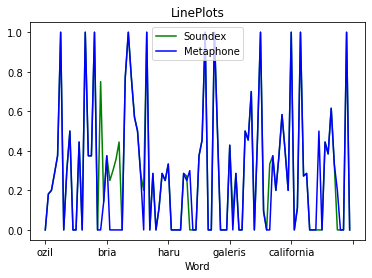

In [ ]:
#Get current axis
ax = plt.gca() 
  
# line plot for math marks
no_df.plot(kind = 'line',
        x = 'Word',
        y = 'Soundex',
        color = 'green',ax = ax)
  
# line plot for physics marks
no_df.plot(kind = 'line',x = 'Word',
        y = 'Metaphone',
        color = 'blue',ax = ax)

# set the title
plt.title('LinePlots')
  
# show the plot
plt.show()

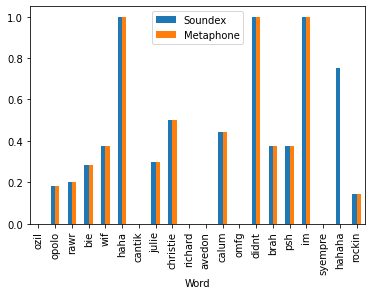

In [ ]:
no_df.plot(kind = 'bar',
        x = 'Word',
        y = ['Soundex','Metaphone'])

In [ ]:
pred = []
i=1
for word in oov_df['Word']:
  bm1 = engine.find_match_levenshtein(word)
  bm2 = engine.find_match_levenshtein_soundex(word)
  bm3 = engine.find_match_levenshtein_metaphone(word)
  pred.append([word,bm1,bm2,bm3])
  print(i)
  i = i+1
norm_df = pd.DataFrame(pred, columns = ['Word', 'Levenshtein','Soundex','Metaphone'])
norm_df.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,Word,Levenshtein,Soundex,Metaphone
0,ozil,oil,NA,NA
1,opolo,polo,opal,opal
2,rawr,raw,rare,rare
3,bie,bide,be,be
4,wif,waif,waif,waif


In [ ]:
norm_df.to_csv('/content/drive/MyDrive/Twitter Lexical Normalisation/df2.csv')